In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
d_tr = pd.read_csv('/Users/antirrabia/Documents/01-GitHub/DataMining-_-/CSV/HousePrices/train.csv', index_col='Id')
d_te = pd.read_csv('/Users/antirrabia/Documents/01-GitHub/DataMining-_-/CSV/HousePrices/test.csv', index_col='Id')

In [3]:
y = d_tr.SalePrice.copy()
d_tr = d_tr.drop(columns='SalePrice').copy()

# d_tr = (1460, 80) , d_te = (1459, 79) = 2919
all_d = pd.concat([d_tr, d_te])#.reset_index()
# full.set_index('Id', inplace=True)

# no need to have this column all value are the same 
# 'AllPub' 2 nan and 1 NoSewa
all_d = all_d.drop(columns='Utilities')

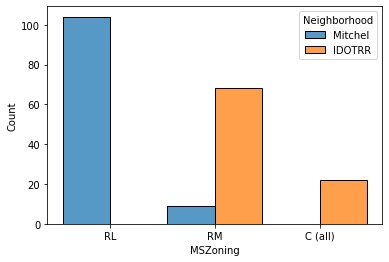

In [4]:
neighbor = ['IDOTRR', 'Mitchel']
plot_data = all_d[all_d['Neighborhood'].isin(neighbor)]

sns.histplot(data=plot_data, x='MSZoning', hue='Neighborhood', multiple='dodge', shrink=.9);

In [9]:
# 34 columns with nan

def fillWithNone(df):
    ''' nan in 'PoolQC' means 'no pool' 
        nan in 'MiscFeature' means 'no misc feature'
        nan in 'Alley' means 'no alley acces'
        nan in 'Fence' means 'no fence'
        nan in 'FireplaceQu' means 'no Fireplace'
        nan in 'GarageType', 'GarageFinish', 'GarageQual',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1'
        'BsmtFinSF2', 'MasVnrType', 'MSSubClass'
        'GarageCond' replaced with 'None' too
    
    recive a df
    '''
    df = df.copy()
    
    columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 
               'FireplaceQu', 'GarageType', 'GarageFinish', 
               'GarageQual', 'GarageCond', 'BsmtQual',
               'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
               'BsmtFinSF2', 'MasVnrType'
              ]
    
    for col in columns:
        df[col] = df[col].fillna('None')
    
    return df


def fillWithZero(df):
    ''' nan 
    
    '''
    df = df.copy()
    
    columns = ['GarageYrBlt', 'GarageArea', 'GarageCars',
               'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
               'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
               'MasVnrArea'
              ]
    
    for col in columns:
        df[col] = df[col].fillna(0)
    
    return df



def fillWithMode(df):
    ''' fill missing values with mode, median
    '''
    df = df.copy()
    
    columns = ['Electrical', 'KitchenQual', 'Exterior1st',
               'Exterior2nd', 'SaleType'
              ]
    
    for col in columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    
    df['LotFrontage'] = (
                     df.groupby('Neighborhood')['LotFrontage']
                     .transform(lambda x: x.fillna(x.median()))
                    )  
    
    # nan means Typical
    df['Functional'] = df['Functional'].fillna('Typ')
    
    return df


def mszoning(df):
    ''' recives a DF this imputation takes place on test data only'''
    
    df = df.copy()
    
    idotrr = ( (df['Neighborhood'] == 'IDOTRR') & (df['MSZoning'].isna()) )
    mitchel = ( (df['Neighborhood'] == 'Mitchel') & (df['MSZoning'].isna()) )
    
    df.loc[ idotrr , 'MSZoning'] = 'RM'
    df.loc[ mitchel, 'MSZoning'] = 'RL'
    
#     # to test this function out of here
#     temp = mszoning(d_te)
#     # lable index acces at [1916, 2217, 2251, 2905
#     temp.loc[[1916, 2217, 2251, 2905], 'MSZoning']
    
    return df
    
none_func = FunctionTransformer(fillWithNone, validate=False) 
zero_func = FunctionTransformer(fillWithZero, validate=False) 
mode_func = FunctionTransformer(fillWithMode, validate=False)


In [7]:
imputer = Pipeline([
                    ('withNone', none_func), 
                    ('withZero', zero_func), 
                    ('withMode', mode_func)
                   ]
                  )

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' '<function fillWithNone at 0x7fd9037d78b0>' (type <class 'function'>) doesn't